In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.lines as mlines
from matplotlib.animation import FuncAnimation
from sklearn.datasets import make_blobs
from sklearn.preprocessing import LabelEncoder
from PIL import Image
import os
import imageio
from datetime import datetime
from tqdm import tqdm


print(plt.style.available)
plt.style.use('ggplot')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


# Generating data

## Using sklearn

In [22]:
# # Create a dataset with 3 blobs
# X, y = make_blobs(n_samples=300, centers=6, n_features=2, cluster_std=1.0, random_state=0)

# # Visualizing the data
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.title('Synthetic Dataset with Several Blobs')
# plt.xlabel('Feature 1')
# plt.ylabel('Feature 2')
# plt.show()


Adding more clusters

In [23]:
# X_extra, y_extra = make_blobs(n_samples = 150, centers=3, n_features=2, cluster_std=1.0, random_state=123)

# no_samples = len(X_extra)
# y_extra = np.random.randint(7, 10, no_samples)

# X = np.vstack([X, X_extra.copy()])
# y = np.hstack([y, y_extra.copy()])



In [24]:
# Visualizing the data
# plt.scatter(X[:, 0], X[:, 1], c=y)
# plt.title('Synthetic Dataset with more Blobs')
# plt.show()

## Using Numpy

In [25]:
# import numpy as np
# import matplotlib.pyplot as plt

# np.random.seed(0)

# mean1 = [2, 2]
# cov1 = [[1, 0], [0, 1]]

# mean2 = [-2, -2]
# cov2 = [[1, 0], [0, 1]]

# labels = []

# # Generate samples
# data1 = np.random.multivariate_normal(mean1, cov1, 100)
# data2 = np.random.multivariate_normal(mean2, cov2, 100)

# # Combine the data from the two clusters
# data = np.vstack((data1, data2))

# # Plot
# plt.scatter(data[:, 0], data[:, 1])
# plt.show()


## Using custom class to generate data from image

In [26]:
class SyntheticDataset:
    def __init__(self, image_path):
        self.image_path = image_path
        self.dataset = None

    def get_dataset(self):
        return self.dataset
    
    def get_image_path(self):
        return self.image_path
    
    def get_image_colors(self):
        img = Image.open(self.image_path)
        return img.getcolors()
    
    def get_image_hist(self):
        img = Image.open(self.image_path)
        return img.histogram()
    
    def generate_data_from_img(self):
        # Open the image
        img = Image.open(self.image_path)

        # Convert the image to RGBA (if it's not already in that format)
        img = img.convert("RGBA")

        # Get the size of the image
        width, height = img.size

        # Prepare a list to hold coordinates and color of colored points
        data = []

        # Loop through each pixel in the image
        for i in range(width):
            for j in range(height):

                # Get the color of the pixel (excluding alpha channel for simplicity)
                r,g,b,a = img.getpixel((i, j))
                if (r,g,b) == (237, 28, 36):
                    data.append((np.array([i,j]), np.array([r,g,b]),'red'))
                if (r,g,b) == (255, 127, 29):
                    data.append((np.array([i,j]), np.array([r,g,b]),'orange'))
                if (r,g,b) == (34, 177, 76):
                    data.append((np.array([i,j]), np.array([r,g,b]),'green'))
                if (r,g,b) == (255, 242, 0) or (r,g,b) == (255, 201, 14):
                    data.append((np.array([i,j]), np.array([r,g,b]),'yellow'))
                if (r,g,b) == (63, 72, 204):
                    data.append((np.array([i,j]), np.array([r,g,b]),'blue'))     

        dataset = pd.DataFrame(data, columns=['coordinate', 'rgb', 'class'])
        self.dataset = dataset
    
    def one_hot_enc(self, column):
        one_hot_df = pd.get_dummies(self.dataset, columns = [column])

        return one_hot_df
    
    def transform_to_numeric_classes(self, labels_col):
        encoder = LabelEncoder()
        df_numeric_classes = self.dataset.copy()
        df_numeric_classes[f'{labels_col}'] = encoder.fit_transform(df_numeric_classes[f'{labels_col}'])

        return df_numeric_classes

    def plot_data(self, **colors: dict):
        df = self.dataset

        plt.figure(figsize=(8,6))

        for label in df['class'].unique():
            class_data = df[df['class'] == label]
            data_x = [coord[0] for coord in class_data['coordinate']]
            data_y = [coord[1] for coord in class_data['coordinate']]

            plt.scatter(data_x, data_y, label=f'Class {label}', alpha=0.5, s=5)

        # Optional: Invert y-axis to match the image's original coordinate system
        # ax.invert_yaxis()

        # Optional: Add legend and titles
        plt.legend()
        plt.title('Pixel Class Distribution')
        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.show()


In [27]:
# Replace 'your_image_path.jpg' with the path to your image
image_path = "C:/Users/Zayan/Documents/code/personal_repos/UFA_TO_UFA/assets/dataset1.png"

dataset = SyntheticDataset(image_path)
dataset.generate_data_from_img()
df_numeric_classes = dataset.transform_to_numeric_classes('class')
df = dataset.get_dataset()


In [28]:
df

,coordinate,rgb,class
0,"[346, 229]","[63, 72, 204]",blue
1,"[346, 230]","[63, 72, 204]",blue
2,"[346, 231]","[63, 72, 204]",blue
3,"[346, 232]","[63, 72, 204]",blue
4,"[346, 233]","[63, 72, 204]",blue
...,...,...,...
6143,"[794, 388]","[237, 28, 36]",red
6144,"[794, 389]","[237, 28, 36]",red
6145,"[794, 390]","[237, 28, 36]",red
6146,"[794, 391]","[237, 28, 36]",red


In [29]:
type(df)

pandas.core.frame.DataFrame

In [30]:
df['class'].value_counts()

class
red       2560
blue      1518
green     1417
yellow     653
Name: count, dtype: int64

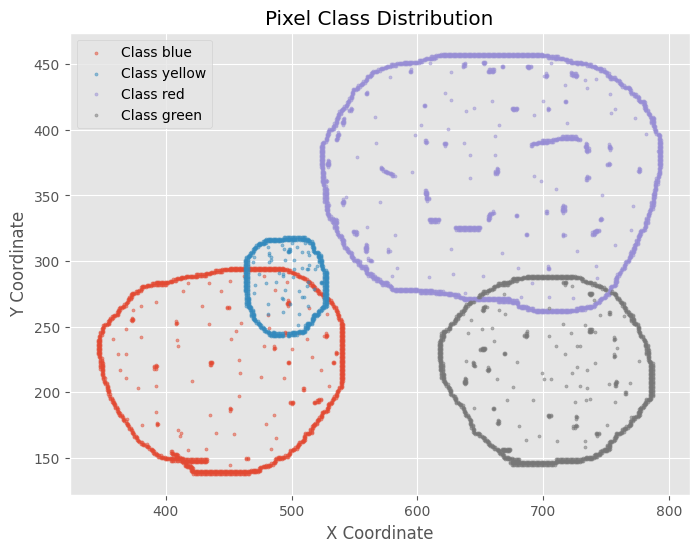

In [31]:
dataset.plot_data()

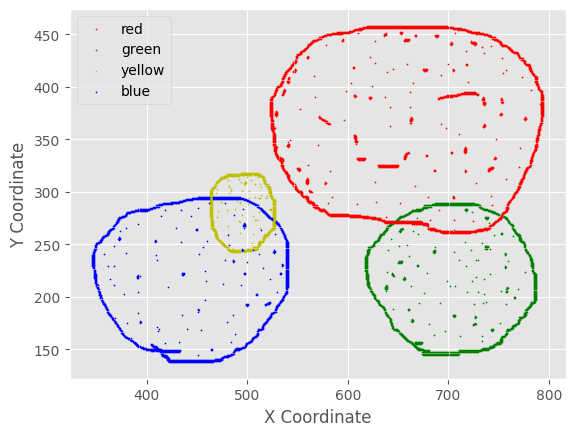

In [32]:
# Create a figure and axis for the plot
fig, ax = plt.subplots()

# List of colors for plotting, should match the classes in your DataFrame
colors = {'red': 'r', 'green': 'g', 'yellow': 'y', 'blue': 'b'}

# Plot each class with its respective color
for label, color in colors.items():
    subset = df[df['class'] == label]
    subset_x = [coord[0] for coord in subset['coordinate']]
    subset_y = [coord[1] for coord in subset['coordinate']]

    ax.scatter(subset_x, subset_y, c=color, s=0.5, label=label)

# Optional: Invert y-axis to match the image's original coordinate system
# ax.invert_yaxis()

# Optional: Add legend and titles
ax.legend()
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


## Neural Gas

In [38]:
def zero(a):
    '''Finds the idx of zeros in an array. This function is a complement of np.nonzero()'''
    mask = a == 0
    zero_idxs : tuple = np.nonzero(mask)
    return zero_idxs

In [37]:
class NeuralGas:
    def __init__(self, data:list, neurons_n, lifetime, epsilon, _lambda, max_iter, fig_save_path):
        self.data = data
        self.neurons = self.create_neurons(neurons_n)
        self.connection_matrix = np.zeros((self.neurons.shape[0], self.neurons.shape[0]))
        self.lifetime = lifetime
        self.e = epsilon
        self._lambda = _lambda
        self.max_iter = max_iter
        self.fig_save_path = fig_save_path

    def run(self):
        for iter in tqdm(range(self.max_iter)):
            choice = np.random.randint(0, self.data.shape[0])
            _input = self.data[choice]
            self.ng_one_input(_input)
            self.save_plot(iter,_input)

        print("Run complete")
        self.create_gif()

    def ng_one_input(self, _input):
        # calculate distances
        distances = np.linalg.norm(self.neurons-_input, axis=1)

        # sort neurons by distance from input
        neuron_idx_sorted_by_dist = np.argsort(distances) # e.g. [0.34, 0.65, 0.1] -> [2, 0, 1]
        # sorted_neurons = self.neurons[neuron_idx_sorted_by_dist]

        # alter connection between closest neurons
        self.alter_connection(neuron_idx_sorted_by_dist[0], neuron_idx_sorted_by_dist[1])

        # update neurons
        for idx, _ in enumerate(self.neurons):
            # find # of better neurons for each neuron
            if idx == 0:
                k = zero(neuron_idx_sorted_by_dist)[0].item() # Note: only 1 element will be 0 in neuron_idx_sorted_by_dist. Thus, zero(neuron_idx_sorted_dist) returns a 1-tuple
            else:
                k = np.nonzero(neuron_idx_sorted_by_dist == idx)[0].item()
            
            # update
            self.neurons[idx] += self.e * np.exp(-k/self._lambda) * (_input - self.neurons[idx])

    def alter_connection(self, r_index, c_index):
        # print(f"lifetime: {self.connection_matrix[r_index, c_index]}")

        # if connection age < lifetime, increase age, else reset
        if self.connection_matrix[r_index, c_index] < self.lifetime:
            # print(f"lifetime between neurons {r_index} and {c_index}=", self.connection_matrix[r_index, c_index])
            self.connection_matrix[r_index, c_index] += 1 # changing the upper triange only
        else:
            print('lifetime reached. Removing connection')
            self.connection_matrix[r_index, c_index] = 0 # reset age
    
    def plot(self, iter, *args):
        '''This plots the data+neurons.
        Info about *args:
            args is a list containing the coordinates of the current input and current neuron ('current' as in the one sampled in the current iteration of the algorithm) thus it is
            [current_input, current_neuron]'''
        fig, ax = plt.subplots()

        ax.scatter(self.neurons[:,0], self.neurons[:,1], marker='X', label='neurons') # plot neurons
        ax.scatter(self.data[:,0], self.data[:,1], s=0.5, label='data') # plot data

        if args:
            cur_input = args[0]
            ax.scatter(cur_input[0], cur_input[1], label='current input')

            if len(args) > 1:
                # optionally, point out the neuron being updated
                neuron = args[1]
                ax.scatter(neuron[0], neuron[1], marker='X', label='neuron')

        # find connections in connection matrix
        for r in range(self.connection_matrix.shape[0]): # checking only upper triangle
            for c in range(self.connection_matrix.shape[1]): # checking only upper triange
                if self.connection_matrix[r,c] > 0:
                    neuron_a = self.neurons[r]
                    neuron_b = self.neurons[c]

                    x_coords = [neuron_a[0], neuron_b[0]]
                    y_coords = [neuron_a[1], neuron_b[1]]

                    line = mlines.Line2D(x_coords, y_coords)
                    ax.add_line(line)                   

        ax.legend()
        ax.set_title(f"Iteration {iter}")
        return fig
    
    def save_plot(self, iter, *points):
        fig = self.plot(iter, *points)
        file_name = os.path.join(self.fig_save_path, f"frame_{iter:04d}.png")
        fig.savefig(file_name)
        plt.close(fig)


    def create_neurons(self, neurons_n, dist='uniform'):
        x_min, y_min = np.amin(self.data, axis=0)
        x_max, y_max = np.amax(self.data, axis=0)

        if dist == 'uniform':
            x_coords = np.random.uniform(x_min, x_max, neurons_n)
            y_coords = np.random.uniform(y_min, y_max, neurons_n)
        
        # create else block for when dist == 'normal' later

        neurons = np.column_stack((x_coords, y_coords))
        return neurons
    
    def create_gif(self):
        figures = []

        for iter in range(self.max_iter):
            file_name = os.path.join(self.fig_save_path, f"frame_{iter:04d}.png")
            figures.append(imageio.imread(file_name))
        
        timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
        gif_path = os.path.join(self.fig_save_path, f"neural_gas_animation_{timestamp}.gif")
        imageio.mimsave(gif_path, figures)



# Test the algorithm with data

In [39]:
df

,coordinate,rgb,class
0,"[346, 229]","[63, 72, 204]",blue
1,"[346, 230]","[63, 72, 204]",blue
2,"[346, 231]","[63, 72, 204]",blue
3,"[346, 232]","[63, 72, 204]",blue
4,"[346, 233]","[63, 72, 204]",blue
...,...,...,...
6143,"[794, 388]","[237, 28, 36]",red
6144,"[794, 389]","[237, 28, 36]",red
6145,"[794, 390]","[237, 28, 36]",red
6146,"[794, 391]","[237, 28, 36]",red


[[346 229]
 [346 230]
 [346 231]
 ...
 [794 390]
 [794 391]
 [794 392]]


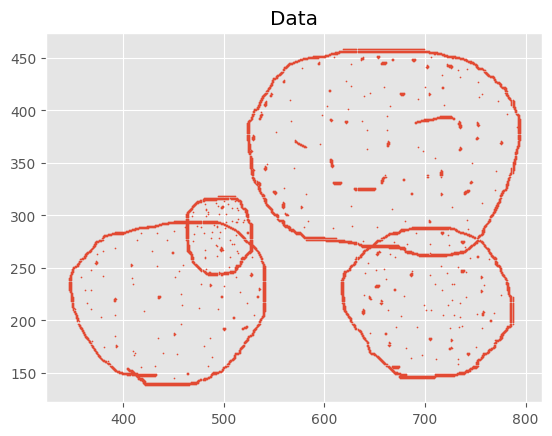

  2%|▏         | 9/500 [00:01<01:43,  4.75it/s]


KeyboardInterrupt: 

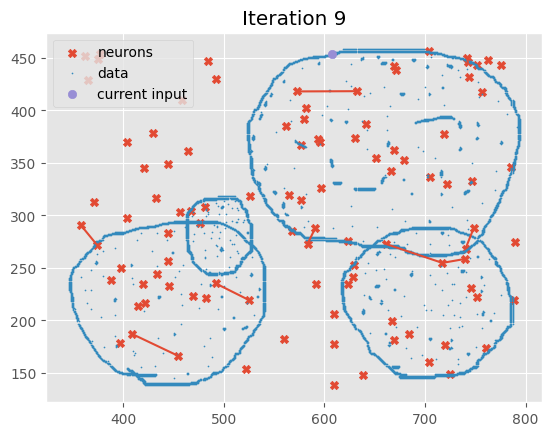

In [40]:
# convert data to numpy 
data = df['coordinate'].to_list()
data = np.array(data)
print(data)
plt.figure()

# plot the data
plt.scatter(data[:,0], data[:,1], s=0.5)
plt.title("Data")
plt.show()

# run algorithm
neural_gas = NeuralGas(data=data,
                       neurons_n=100,
                       lifetime=5,
                       epsilon=0.1,
                       _lambda=0.1,
                       max_iter=500,
                       fig_save_path='c:/Users/Zayan/Documents/code/personal_repos/UFA_TO_UFA/results')

neural_gas.run()

In [ ]:
neural_gas.create_animation()

: 

# Test with a few codebooks and 1 input

In [ ]:
# test

# create sample neurons and an input
neurons = np.random.rand(5,2) # 5 neurons
input = np.random.rand(1,2) # 1 input

# initialize connection matrix
connections = np.zeros((neurons.shape[0], neurons.shape[0]))
print("connections")
print(connections)

plt.figure()
plt.scatter(neurons[:,0], neurons[:,1])
plt.scatter(input[0][0], input[0][1])


# calculate distances
print("neurons = ", neurons)
print("input = ", input)
print("distances")
distances = np.linalg.norm(neurons-input, axis=1)
print(distances)

# sort distances 
print("Sorted indices for distances")
sorted_indices = np.argsort(distances)
print(sorted_indices)

# find closest and second closest neurons/codebooks/prototypes
closest_neuron = neurons[sorted_indices[0]]
second_closest_neuron = neurons[sorted_indices[1]]
print("closest neuron = ", closest_neuron)
print("closest neuron = ", second_closest_neuron)

# make connection and plot connection
connections[sorted_indices[0], sorted_indices[1]] = 1 # change on the upper triange
print(connections)

x_coords = [closest_neuron[0], second_closest_neuron[0]]
y_coords = [closest_neuron[1], second_closest_neuron[1]]

plt.plot(x_coords, y_coords)
plt.show()


: 

# Test with a few codebooks and 2 inputs

In [ ]:
# test
np.random.seed(0)
# create sample neurons and an input
weights = np.random.rand(5,2)
X = np.random.rand(2,2)

connections = np.zeros((weights.shape[0], weights.shape[0]))
lifetimes = np.zeros_like(connections)

print("connections")
print(connections)
print("lifetimes")
print(lifetimes)



: 

In [ ]:
fig, ax = plt.subplots()
ax.scatter(weights[:,0], weights[:,1])
ax.scatter(X[:,0], X[:,1])

max_iter = 10
eps = 0.1
lambda_ = 0.1
max_lifetime = 5

for iter in range(max_iter):
    print("---")
    print("Iteration ", iter)

    # calculate distances
    print("neurons = ", weights)
    print("inputs = ", X)
    print("distances")
    distances = np.array([np.linalg.norm(weights-x, axis=1) for x in X])
    print(distances)

    # sort distances 
    print("Sorted indices for distances")
    ranking = np.argsort(distances)
    print(ranking)

    # find closest and second closest neurons/weights/prototypes
    closest_neurons = weights[ranking[:,0]]
    second_closest_neurons = weights[ranking[:,1]]
    print("closest neurons = ", closest_neurons)
    print("second closest neurons = ", second_closest_neurons)

    # make connection and plot connection
    # update connection matrix
    for i in range(len(X)):

        if connections[ranking[i][0], ranking[i][1]] != 1: # if connection doesn't exist
            connections[ranking[i][0], ranking[i][1]] = 1 # make connection
            lifetimes[ranking[i][0], ranking[i][1]] += 1 # increase age
        else: # if connection exists
            if lifetimes[ranking[i][0], ranking[i][1]] == max_lifetime: # if lifetime is at its max
                connections[ranking[i][0], ranking[i][1]] = 0 # break connection
                lifetimes[ranking[i][0], ranking[i][1]] = 0 # reset age
            else: # if lifetime is not at its max
                lifetimes[ranking[i][0], ranking[i][1]] += 1 # increase age

    print(connections)
    print(lifetimes)

    # loop over connection matrix and find neurons to connect. Then connect them in the plot
    for r in range(connections.shape[0]):
        for c in range(connections.shape[1]):
            if connections[r,c] == 1:
                codebook1 = weights[r]
                codebook2 = weights[c]

                x_coords = [codebook1[0], codebook2[0]]
                y_coords = [codebook1[1], codebook2[1]]

                line = mlines.Line2D(x_coords, y_coords)
                ax.add_line(line)

    # select random input & update weights
    sampled_input_idx = np.random.randint(0, len(X))
    sampled_input = X[sampled_input_idx]

    for i in range(len(weights)):
        print(i)
        # determine k: number of neurons closer to sampled input v than w itself
        k = np.where(ranking[sampled_input_idx] == i)[0]
        # update weight
        weights[i] = weights[i] + eps * np.exp(-k/lambda_)*(sampled_input - weights[i])
        print(weights[i])
plt.show()


: 